GAN은 adversarial process를 통해 서로 영향을 미치는 두 개의 model을 동시에 학습시키는 방법이다. 두 model은 Gernerative model(G)과 Discriminative model(D)로,

Generative model의 경우 training data의 특징(data distribution)을 파악하여 training data와 유사한 Fake(가짜) data를 생성하는 일을 한다. 

Discriminative model의 경우, Generative model이 만든 가짜 data와 실제 training data를 구별하여 training data일 확률을 평가하는 역할을 한다. 우리가 흔히 사용하는 CNN으로 분류하는 모델이라고 생각하면 된다. 

GAN의 궁극적인 목표는 Generative model이 만든 Fake data를 Discriminative model이 구별하기 힘들게 만드는 것이다.(진짜일 확률 50, 가짜일 확률 50일 정도로 판별하기 힘들게 만들기) 즉, input data의 data distribution과 fake data의 data distribution이 굉장히 비슷하게 되도록 fake data를 만드는 것이다.

이 논문에서는 Gernerative model은 기존의 training data에 random noise를 입히는 형태로 Fake data를 생성하였고, 두 model 모두 multilayer perceptron으로 만듦.


**Adversarial Nets**

Adversarial Net은 multiLayer perceptron으로 구성된 두 model을 통해 표현할 수 있다.

Generative model: 새로운 data distribution을 생성시킨다.

training data를 x라고 할 때, 이 input x가 Generative model를 지나면 $p_g$의 data distiribution을 갖게 된다.
이 과정은 generative model의 random noise에 의해 x가 input noise variable인 $p_z$(z)가 되고, 이 noise variable z가 MultiLayer Perceptron에 의해 G(z ; $\theta$g)로 data 공간에 mapping되어 output인 $p_g$의 data distribution을 만든다. 

input data (x) -> input noise variables (z) -> Generative model output ($p_g$)

Discriminative model: 

training data x가 Discriminative model의 MultiLayer perceptron D(x ; $\theta$d)에 의해 하나의 single scalar output을 갖게 된다. 

input data (x)  ->  a single scalar



GAN은 

Discriminative model의 경우, 'training data'와 'Generative model이 만든 fake data'가 올바른 Label로 분류하도록 학습시킨다. 

또한 동시에

Generative model의 경우, 자신이 만든 fake data를 Discriminative model이 잘 분류하지 못하도록 학습시킨다.

이를 식으로 정리하면 다음과 같다.

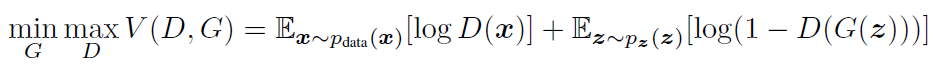


logD(x) 는 Discriminative model에 의한 결과 부분으로 Maximize 되도록 학습하고,  log( 1 - D( G(z) ) ) 는 Generative model에 의한 결과 부분으로 minimize 되도록 학습한다. 그러면 결과적으로 Discriminative model과 Generative model이 trade off 관계로 서로 경쟁하는 관계로 표현할 수 있다.


Discriminative model이 fake와 진짜 data를 잘 분류한다고 가정하면, input이 진짜 training data: x일 경우, D(x)=1이 될 것이고, 반대로 D(G(z))=0이 될 것이다. 그러면 minmax V(D,G)=0이 된다.

반대로, Generative model이 fake data를 너무 잘 만들어서 Discriminative data가 구별을 잘 못한다고 가정하면, Discriminative model은 D(G(z))는 1이 될 것이다. 그러면 log(0)= -무한대가 되므로, 결론적으로 minmax V(D,G) = -inf 가 된다.

즉, Disciriminative model은 V(D,G)가 최대가 되는 0이 되도록 학습하고, Generative model은 V(D,G)가 최소가 되는 -inf가 되도록 학습한다.
 

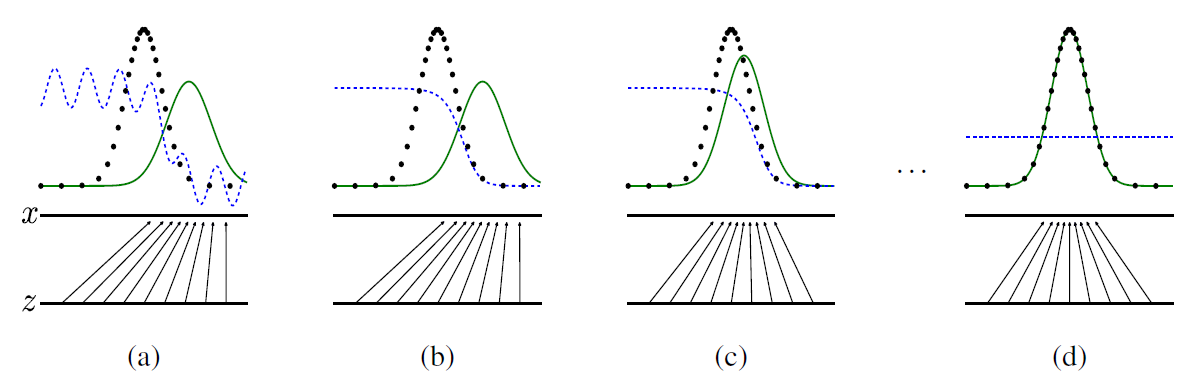

위 그림에서 검은 점선은 진짜 data가 만드는 data distribution ($p_{data}$)이고, 초록색 선은 Generative model이 생성해낸 fake data의 data distribution ($p_g$)이다. 

파란 점선은 실제 data(검정색)과 fake data(초록색)의 유사도를 나타내는 선이다.

(a)에서 (d)가 되면서 점점 실제 data와 fake data가 유사해지고 ($p_g$ = $p_{data}$), Discriminative model는 진짜와 가짜를 구별하지 못하여 D(x)=1/2 로 판별하게 된다. 

**최적화**

Discriminative model과 Generative model의 학습 알고리즘을 나타낸 그림이다. Discriminative model과 Generative model의 최적화를 위해서, Generative model이 k번 학습할 때, Discriminative moedl은 1번 학습시킨다.

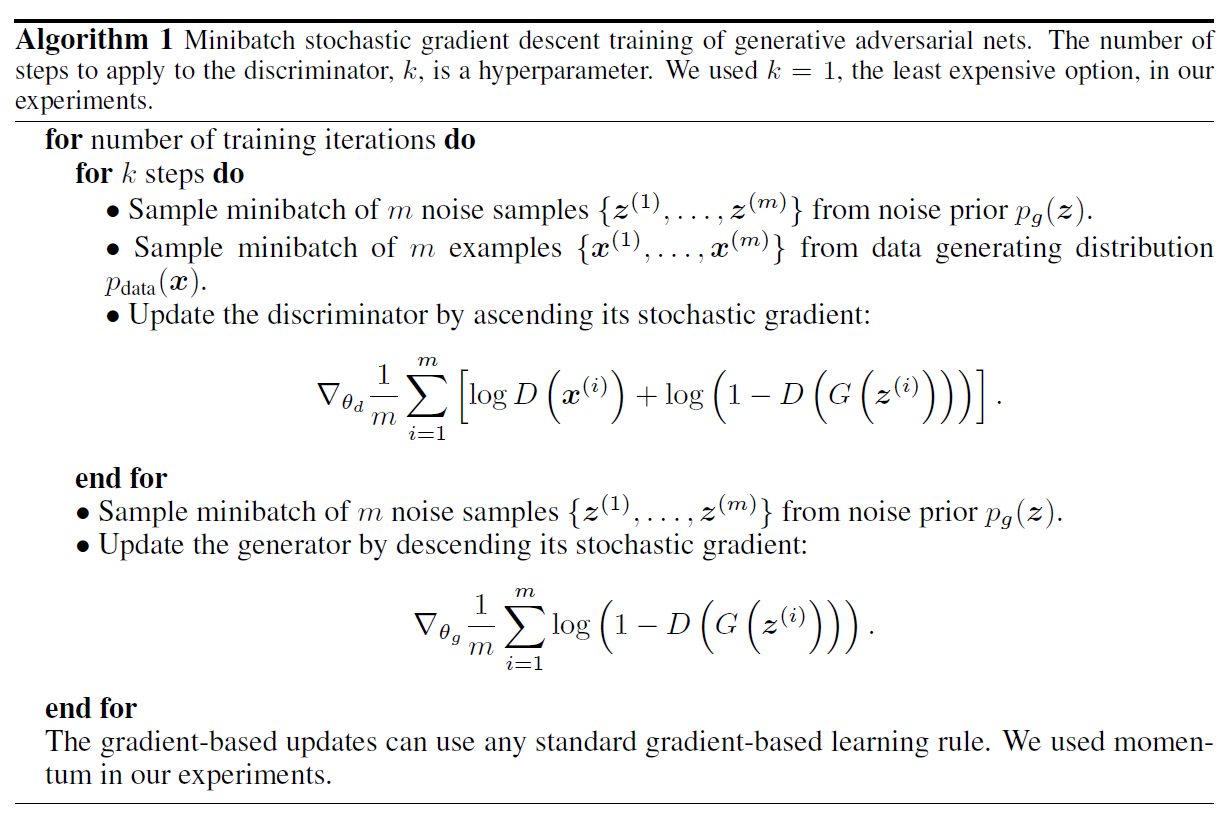

**(1) Global optima는 $p_g$ = $p_{data}$ 일 때 갖는다.**



고정된 Generative model G에 대한 최적화된 Discriminative model D를 생각해보면, 다음의 식을 갖는 형태가 된다.

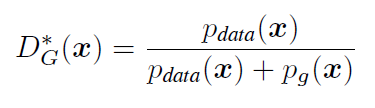



이유는 GAN model은 앞에서 언급한 V(G,D) 식을 최대화 시키는 방향으로 학습을 진행하기 때문이다. V(G,D)를 연속적인 data distribution에 대해서 나타낸 다음의 식을 보면, 

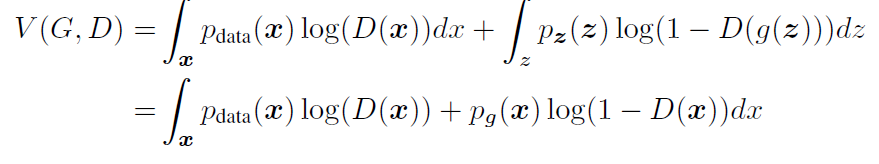

y = a log(y) + b log(1-y) 형태의 식을 갖는 것을 볼 수 있는데, 이를 미분하면 a/y - b/(1-y) = 0이 되고, y= a/(a+b) 가 되기 때문이다. 

이를 V(G,D)의 식에 대응시키면, V(G,D)가 최대가 되는 최적화된 Discriminative model은 D* = $p_{data}$ / ( $p_{data}$ + $p_g$ ) 가 되는 것을 알 수 있다.

이 값을 V(G,D)의 식에 대입하면,

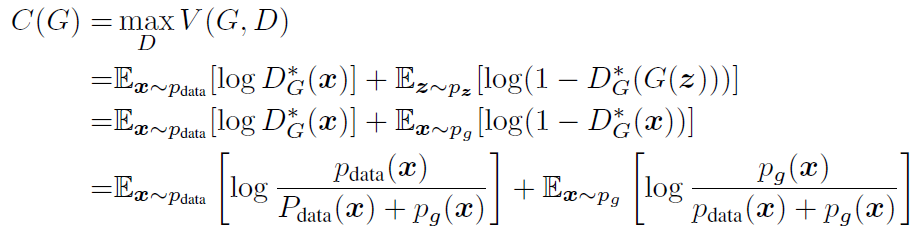

로 만들 수 있다.


C(G)는 $p_g$ = $p_{data}$일 때 global minimum인 최소값을 갖게되는데, 그 값은 -log4이다.

이에 대한 증명은... $p_g$ = $p_{data}$일 때, D* = 1/2가 되어서 C(G)=log(1/2) + log(1/2) = -log4를 갖게 되는데, 이 값이 global minimum이 되는 유일한 경우인 것을 확인해 봄으로써 알 수 있다.

C(G)=max V(G,D) 식을 다음의 형태로 변형할 수 있다.

C(G)= $E_{x - p_{data}}$ [ log $\frac{p_{data}}{p_{data} + p_g} ]$ + $E_{x - p_g}$ [ log $\frac{p_g}{p_{data} + p_g} ]$

=  $E_{x - p_{data}}$ [ log $\frac{ \frac{p_{data}}{2} }  {\frac{ p_{data} + p_g }{2} }]$ + $E_{x - p_{g}}$ [ log $\frac{ \frac{p_g}{2} }  {\frac{ p_{data} + p_g }{2} }]$ 

= $E_{x - p_{data}}$ [ log $p_{data}$ - log2 - log $\frac{ p_{data} + p_g }{2}$ ] + $E_{x - p_{g}}$ [ log $p_g$ - log2 - $\frac{ p_{data} + p_g }{2}$] 

= $E_{x - p_{data}}$ [ log $\frac{ p_{data}}  {\frac{ p_{data} + p_g }{2} } - log2]$ + $E_{x - p_{g}}$ [ log $\frac{ {p_g} }  {\frac{ p_{data} + p_g }{2} } - log2]$ 

= -log4 + $E_{x - p_{data}}$ [ log $\frac{ p_{data}}  {\frac{ p_{data} + p_g }{2} }$] + $E_{x - p_{g}}$ [ log $\frac{ {p_g} }  {\frac{ p_{data} + p_g }{2} }]$

이를 두 확률분포의 차이를 통해 유사도를 측정하는 Kullback - Leibler divergence (KL)의 표현식으로 나타내면,  (KL divergence 정의)

C(G) = -log4 + KL($p_{data}$ || $\frac{ p_{data} + p_g }{2}$) + KL($p_g$ || $\frac{ p_{data} + p_g }{2}$)

로 나타낼 수 있다. 이를 KL(p || q) = KL{q || p) 가 성립하는 Janssen-Shannon divergence (JSD)로 나타내면 (JSD의 정의)

C(G) = -log4 + 2*JSD($p_{data}$ || $p_g$) 

가 된다.

JSD는 두 확률분포가 항상 양수를 갖고, 오직 두 확률분포가 동일할 경우 0를 갖게 된다. 따라서 두 확률분포 $p_{data}$와 $p_g$가 같은 경우에 C(G)는 global minimum인 -log4를 갖게 된다는 것이 증명된다.



**(2) Algorithm 1의 수렴**

Algorithm1의 매 step마다 Discriminative model은 주어진 Generative model에 대해서 최적화된 값을 갖는 것이 가능하다. 또한 Generative model은 생성해낸 fake data distribution ($p_g$)를 update함으로써 $p_g$가 $p_{data}$에 도달하도록 만든다.

이를 증명하면,

V(G,D)에서 G가 $p_g$를 갖는 모델을 U($p_g$, D)라고 하자. C(G)는 JSD의 형태를 따라가기 때문에 0을 제외한 다른 부분은 양수를 갖는다. 따라서 U($p_g$, D)는 아래로 볼록한 형태인 Convex한 함수인 것을 알 수 있다.

앞에서 오직 $p_g$= $p_{data}$일 때에만 global minimum을 갖는 것을 증명하였다. 거기에 GAN은 V(G,D)의 형태를 갖고 있고 여기서는 $p_g$에 따라 변하는 U($p_g$, D)의 형태를 갖고 있다. 또한, U($p_g$, D)는 convex한 형태의 함수이다. 

U($p_g$, D)가 convex한 함수이고, 오직 $p_g$ = $p_{data}$일 때에만 global minimum을 갖는다면, $p_g$를 계속해서 update하면 결국에는 $p_g$ -> $p_{data}$로 수렴하게 된다. gradient descent가 error을 최소로 하기 위해서 $p_g$를 update하여 error가 최소가 되는 $p_{data}$로 수렴하는 것과 같은 의미이다.

따라서, 이 알고리즘은 $p_g$가 $p_{data}$에 수렴하도록 학습시킨다는 것을 보여준다.





위의 원리를 기반으로, 이 논문에서는 MNIST, CIFAR-10 등에 대해서 실험을 진행했다.

여기서는 MNIST data와 Pytorch를 이용해서 GAN을 구현할 것이다.

In [ ]:
import os
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils import data

import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

batch_size=32
DEVICE='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
datapath='/data'

if not os.path.exists(datapath):
  os.mkdir(datapath)

# transform으로 원하는 형태의 dataset으로 변환
tfData=transforms.Compose([transforms.ToTensor(),
                           transforms.Normalize((0.5), (0.5))])  # 평균, 표준편차

# pytorch에서 제공하는 MNIST dataset을 불러온다.
train_data=datasets.MNIST(datapath, train=True, transform=tfData, download=True)
test_data=datasets.MNIST(datapath, train=False, transform=tfData, download=True)

print(train_data.data.shape)
print(test_data.data.shape)

# dataset을 batch size만큼 나눠서 섞어줌
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([28, 28])


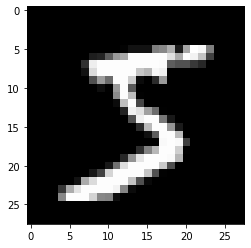

In [ ]:
print(train_data.data[0].shape)
plt.imshow(train_data.data[0], cmap='gray')  # MNIST내의 이미지를 흑백사진으로 출력

In [ ]:
for x, y in train_loader:
  print(x.shape, y.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


GAN 구조 만들기

GAN은 Generative model(G)과 Discriminative model(D)의 상호 경쟁을 통해 학습하므로 G와 D 구조를 구현한다.

In [ ]:
# Generative model은 noise를 입력을 받아 fake data를 생성하는 모델이다. 
class Generative(nn.Module):
  def __init__(self, z_dim, x_dim):  # Generative model의 input은 input noise variable인 z의 크기이고,
    super().__init__()               # 만들어진 fake output은 원래 input data와 같은 크기인 x의 크기이다. 
    
    # Fully connected Layer 구조로 Batch normalization과 ReLU activation function을 이용하였다.
    self.fc1=nn.Linear(z_dim, 128)   
    self.norm1=nn.BatchNorm1d(128)  # 칼라가 있는 3채널의 이미지가 아닌 1채널이므로 BatchNorm1d를 사용함
    self.act1=nn.ReLU()

    self.fc2=nn.Linear(128, 256)
    self.norm2=nn.BatchNorm1d(256)
    self.act2=nn.ReLU()

    self.fc3=nn.Linear(256,512)
    self.norm3=nn.BatchNorm1d(512)
    self.act3=nn.ReLU()
    
    self.fc4=nn.Linear(512, 1024)
    self.norm4=nn.BatchNorm1d(1024)
    self.act4=nn.ReLU()

    self.fc5=nn.Linear(1024, x_dim)

  def forward(self, z):
    z=self.fc1(z)
    z=self.norm1(z)
    z=self.act1(z)

    z=self.fc2(z)
    z=self.norm2(z)
    z=self.act2(z)

    z=self.fc3(z)
    z=self.norm3(z)
    z=self.act3(z)

    z=self.fc4(z)
    z=self.norm4(z)
    z=self.act4(z)

    z=self.fc5(z)

    return z

In [ ]:
# Discriminative model은 input data를 fake인지 진짜인지 판별하는 model이다.
class Discriminative(nn.Module):
  def __init__(self, x_dim):
    super().__init__()

    self.fc1=nn.Linear(x_dim, 512)
    self.act1=nn.LeakyReLU(0.2)    # Discriminative model의 경우 LeakyRelu가 더 잘 작동한다고 한다
    self.fc2=nn.Linear(512, 256)
    self.act2=nn.LeakyReLU(0.2)
    self.fc3=nn.Linear(256, 1)

  def forward(self, x):
    x=self.fc1(x)
    x=self.act1(x)
    x=self.fc2(x)
    x=self.act2(x)
    x=self.fc3(x)

    return torch.sigmoid(x)

In [ ]:
x_dim=train_data.data[0].shape[0] * train_data.data[0].shape[1]
print(x_dim)
z_dim=100
z=torch.randn(batch_size, z_dim).to(DEVICE)  # batch_size만큼 random noise 생성하기
print(z.shape)

784
torch.Size([32, 100])


In [ ]:
G=Generative(z_dim, x_dim).to(DEVICE)
print(G)
g=G(z)
print(g.shape)

Generative(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (fc3): Linear(in_features=256, out_features=512, bias=True)
  (norm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): ReLU()
  (fc4): Linear(in_features=512, out_features=1024, bias=True)
  (norm4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act4): ReLU()
  (fc5): Linear(in_features=1024, out_features=784, bias=True)
)
torch.Size([32, 784])


In [ ]:
import numpy as np
D=Discriminative(x_dim).to(DEVICE)
print(D)
x = torch.randn(16,1,28,28).to(DEVICE)
x=x.view(16, -1).to(DEVICE)
print(x.shape)
d=D(x)
print(d.shape)

Discriminative(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (act1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (act2): LeakyReLU(negative_slope=0.2)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)
torch.Size([16, 784])
torch.Size([16, 1])


Train 하기

In [ ]:
# Generative model과 Discriminative model 각각에 대한 optimizer를 지정해준다
G_optimizer=optim.Adam(G.parameters(), lr=0.00002, betas=(0.5, 0.999))
D_optimizer=optim.Adam(D.parameters(), lr=0.00002, betas=(0.5, 0.999))

criterion=nn.BCELoss()  # loss function으로 Binary cross entropy loss를 사용함.

In [ ]:
def train(train_loader, G, D, criterion, G_optimizer, D_optimizer, batch_size, z_dim, device):

  G.train()
  D.train()
  for batch_x, batch_y in train_loader:
    X=batch_x
    X=X.view(batch_size, -1).to(device)      # image data
    y_real=torch.ones(batch_size, 1).to(device)  # 진짜 data일 경우 1으로 채운 텐서를 Label로 지정 
    y_fake=torch.zeros(batch_size, 1).to(device)  # 가짜 data일 경우 0으로 채운 텐서를 Label로 지정

    # Discriminaive model
    D_real_pred=D(X)       # 진짜 data를 discriminative model이 판별한 결과   

    z=torch.randn(batch_size, z_dim).to(device)  # input noise  variables 생성
    fake_X=G(z).detach()                         # 가짜 data 생성 Generative model의 output               
    D_fake_pred=D(fake_X)  # 가짜 data를 discriminative model이 판별한 결과

    # Discriminative model의 loss     
    D_real_loss=criterion(D_real_pred, y_real)  # real data에 대한 loss: 진짜 data를 진짜라고 잘 판별하는지
    D_fake_loss=criterion(D_fake_pred, y_fake)  # fake data에 대한 loss: 가짜 data를 가짜라고 잘 판별하는지
    D_loss = (D_real_loss+ D_fake_loss)/2  # Discriminative model의 loss: 위 두개의 평균  

    # Discriminative model의 Back propagation과 parameter 업데이트
    D.zero_grad()
    D_loss.backward()
    D_optimizer.step()


    # Generative model
    z=torch.randn(batch_size, z_dim).to(device)  # input noise  variables 생성
    fake_X=G(z).to(device)    # 가짜 data 생성 Generative model의 output
    D_fake_pred=D(fake_X)  # 가짜 data를 discriminative model이 판별한 결과
    
    # Generative model의 loss
    G_loss=criterion(D_fake_pred, y_real)     # Generative model의 loss: G가 만든 fake data가 진짜 data와 얼마나 차이가 나는지
    
    # Generative model의 Backward 
    D.zero_grad()
    G.zero_grad()    
    G_loss.backward()
    G_optimizer.step()
    

  return G, D, G_loss, D_loss

In [ ]:
def makeFake(G, z_dim, device):  

  noise=torch.randn(10, z_dim).to(device)  # 10개의 input noise  variables 생성
  fake_img=G(noise).reshape(10, 28,28).cpu()
  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(fake_img[i], cmap='gray')
  plt.show()


epoch: 0 G_loss: 0.751318, D_loss: 0.660601


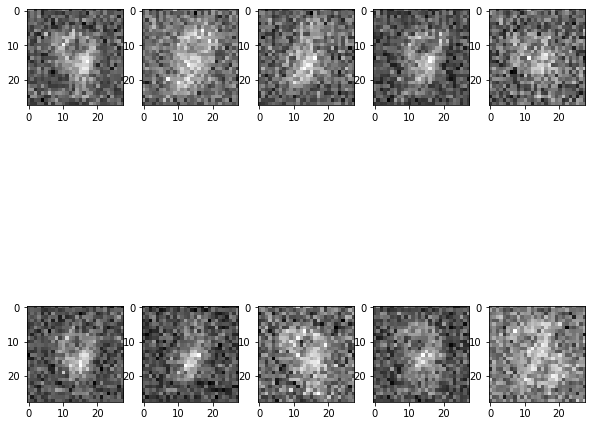

epoch: 5 G_loss: 0.687620, D_loss: 0.690847
epoch: 10 G_loss: 0.685955, D_loss: 0.698031
epoch: 15 G_loss: 0.698033, D_loss: 0.692373
epoch: 20 G_loss: 0.713090, D_loss: 0.687031


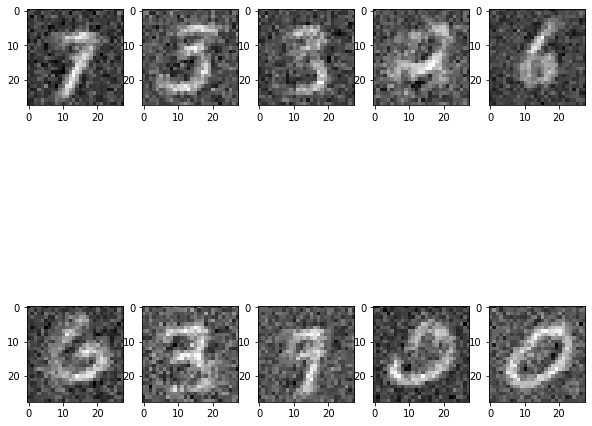

epoch: 25 G_loss: 0.696053, D_loss: 0.692306
epoch: 30 G_loss: 0.709247, D_loss: 0.691335
epoch: 35 G_loss: 0.698661, D_loss: 0.690610
epoch: 40 G_loss: 0.700266, D_loss: 0.685804


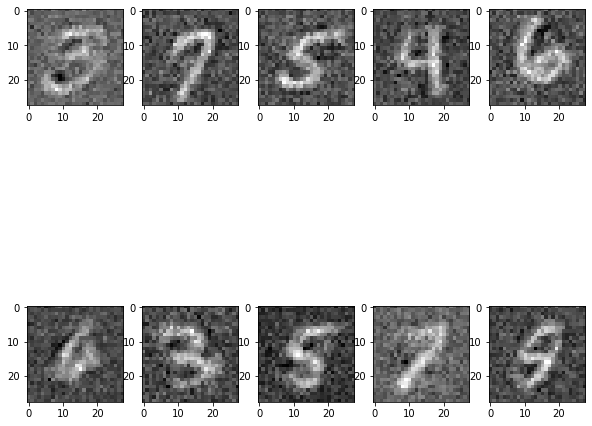

epoch: 45 G_loss: 0.705518, D_loss: 0.684531
epoch: 50 G_loss: 0.682751, D_loss: 0.685462
epoch: 55 G_loss: 0.742980, D_loss: 0.672643
epoch: 60 G_loss: 0.714095, D_loss: 0.681329


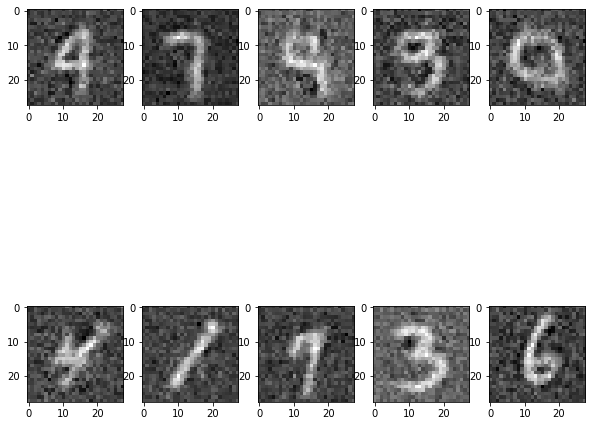

epoch: 65 G_loss: 0.718602, D_loss: 0.663799
epoch: 70 G_loss: 0.734301, D_loss: 0.662994
epoch: 75 G_loss: 0.723553, D_loss: 0.653052
epoch: 80 G_loss: 0.802307, D_loss: 0.635290


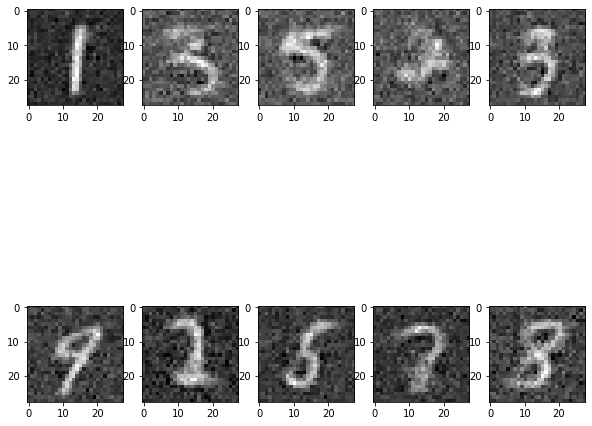

epoch: 85 G_loss: 0.806445, D_loss: 0.618747
epoch: 90 G_loss: 0.784947, D_loss: 0.644598
epoch: 95 G_loss: 0.816466, D_loss: 0.622982
epoch: 100 G_loss: 0.838386, D_loss: 0.623738


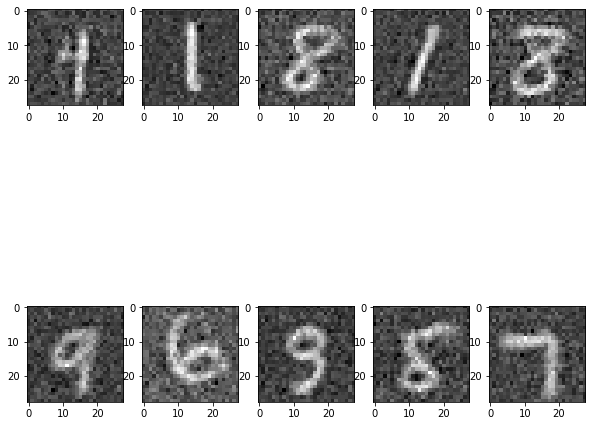

In [ ]:
epochs=101
for epoch in range(epochs):
  G, D, G_loss, D_loss=train(train_loader, G, D, criterion, G_optimizer, D_optimizer, batch_size, z_dim, DEVICE)  

  if epoch%5==0:
    print('epoch: %.0f G_loss: %.6f, D_loss: %.6f' %(epoch, G_loss.item(), D_loss.item()))

  if epoch%20==0:
    G.eval()
    with torch.no_grad():
      makeFake(G, z_dim, DEVICE)

100 epochs동안 GAN model의 학습을 진행하였다. 0 epoch에서 생성해낸 Fake data에 비해서 점차 더 나아진 Fake data를 생성해내었다. 하지만 여전히 뭉개지는 이미지가 있었고, 더 많은 학습이 진행된다면, 진짜 이미지와 비슷한 fake를 만들어낼 수 있을 것이다.

참조

https://github.com/EmjayAhn/GAN-pytorch

